## Estimation of the snow cover based on remote sensing data with high spatial resolution

### Goals: 
The aim of this project is the estimation of the snow cover thanks to image fusion techniques, in order to obtain maps with a resolution as high as possible. Images which are aquired by the several Landsat satellites can also be used at the same time in order to generate a robust estimation of the scope of the snow cover.

The estimation of the snow cover in the mountains is currently used as part of the avalanches forecasts or forecasts of the flow in watercourses.

Importation of the libraries that are useful for this coding :

In [1]:
import numpy as np
import skimage 
from skimage import io
skimage.__version__
import matplotlib.pyplot as plt

### METHOD 1 : 
##### Count of pixels of a certain defined color

***Preamble***: 
Size image display : 

In [2]:
img = io.imread("https://img.20mn.fr/iYOR5gOVRPGKF0r6Zomvzw/830x532_baie-mont-saint-michel-sous-neige-vue-depuis-espace-10-fevrier-2021.jpg")
height_img=img.shape[0]
width_img=img.shape[1]
surface_img=height_img*width_img

print("Height of the image:",height_img,"pixels")
print("Width of the image:",width_img,"pixels")
print("Surface of the image",surface_img,"squared pixels")

Height of the image: 532 pixels
Width of the image: 830 pixels
Surface of the image 441560 squared pixels


#### Counting pixel program
Counting program for white pixels (or blue in order to compare with Images already treated provided by Landsat collection) that are presents in the image, in 3D (RGB image) and 2D (panchromatic image for NDSI) : 

In [3]:
def counting_pixel_white3D(img):

    pixel_r = 0
    pixel_g = 0
    pixel_b = 0
    
    pixel_r = np.logical_and(img[:,:,0] > 210, img[:,:,0] < 255)
    pixel_g = np.logical_and(img[:,:,1] > 210, img[:,:,1] < 255)
    pixel_b = np.logical_and(img[:,:,2] > 210, img[:,:,2] < 255)

    nbr_pixels_w = np.sum(pixel_b * pixel_g * pixel_r)

    return nbr_pixels_w

#Demo
image = io.imread("https://img.20mn.fr/iYOR5gOVRPGKF0r6Zomvzw/830x532_baie-mont-saint-michel-sous-neige-vue-depuis-espace-10-fevrier-2021.jpg")
nbr_pixels_w = counting_pixel_white3D(image)
print(nbr_pixels_w)

151415


In [17]:
def counting_pixel_white2D(img):
    
    nbr_pixels_w = np.logical_and(img[:,:] > 0.4 , img[:,:] < 1 )

    return nbr_pixels_w

In [36]:
def counting_blue_pixels(img):
    original=imageio.imread(img)
    img=original.copy()

    pixel_r = 0
    pixel_g = 0
    pixel_b = 0
    
    pixel_r = np.logical_and(img[:,:,0] > 50, img[:,:,0] < 140)
    pixel_g = np.logical_and(img[:,:,1] > 140, img[:,:,1] < 255)
    pixel_b = np.logical_and(img[:,:,2] > 140, img[:,:,2] < 255)

    nbr_pixels_b = np.sum(pixel_b * pixel_g * pixel_r)

    return nbr_pixels_b

#### Results display program
Program showing the new image that is only composed with white pixels :

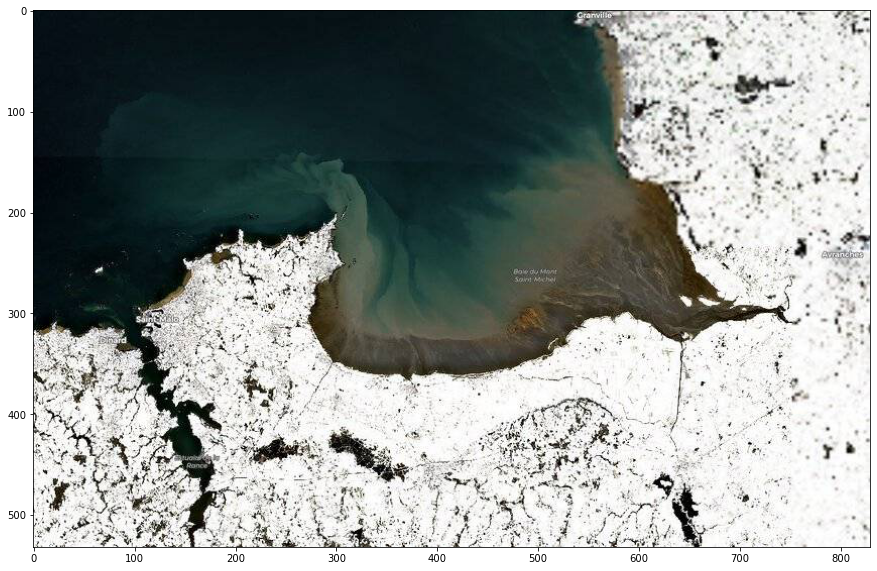

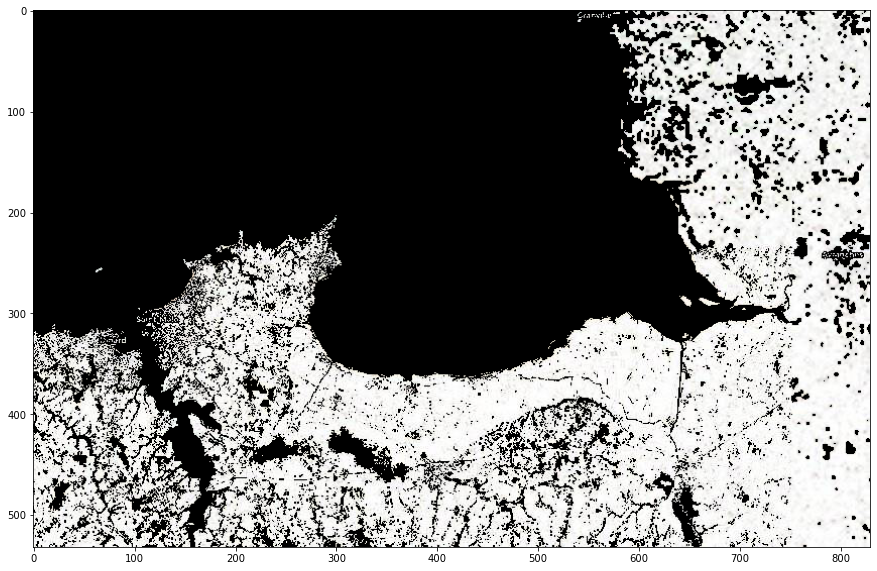

In [6]:
def display_white_pixels(img):
    
    height_img = img.shape[0]
    width_img = img.shape[1]
    threshold = 210
    
    for x in range (width_img):
        for y in range (height_img):
            if img[y,x][0] < threshold and img[y,x][1] < threshold and img[y,x][2] < threshold:
                img[y,x][0] = img[y,x][1] = img[y,x][2] = 0
    
    return img

#Demo
original = io.imread("https://img.20mn.fr/iYOR5gOVRPGKF0r6Zomvzw/830x532_baie-mont-saint-michel-sous-neige-vue-depuis-espace-10-fevrier-2021.jpg")
np.max(original)
_, ax = plt.subplots(figsize=(15,15))
ax.imshow(original)
plt.show()
display = display_white_pixels(original)
np.max(display)
_, ax = plt.subplots(figsize=(15,15))
ax.imshow(display)
plt.show()

#### Snow cover calculation
Program showing the snow cover on an image (united : squared meter) in 3D (RGB image) and 2D (panchromatic image for NDSI): 

In [28]:
def snowfall_surface3D (img):
    
    resolution = 10  #resolution of the satellite (in meter)
    nbr_white_pixels = counting_pixel_white3D(img)
    surface = resolution ** 2 * nbr_white_pixels
    
    return surface

image= io.imread("https://img.20mn.fr/iYOR5gOVRPGKF0r6Zomvzw/830x532_baie-mont-saint-michel-sous-neige-vue-depuis-espace-10-fevrier-2021.jpg")
print("Snowfall surface:", snowfall_surface3D(image),"m^2")

Snowfall surface: 15141500 m^2


In [29]:
def snowfall_surface2D (img):
    
    resolution = 10  #resolution of the satellite (in meter)
    nbr_white_pixels = counting_pixel_white2D(img)
    surface=resolution ** 2 * nbr_white_pixels
    
    return surface

In [39]:
def snowfall_surface3D_blue (img):
    
    resolution = 10  #resolution of the satellite (in meter)
    nbr_blue_pixels = counting_blue_pixel(img)
    surface = resolution ** 2 * nbr_blue_pixels
    
    return surface

### METHOD 2 : 
##### NDSI calculation

***Preamble***: Size check : 

In [40]:
def size_check(img1, img2):
    size_img1 = img1.shape
    size_img2 = img2.shape 
    if(size_img1 == size_img2): 
       return 1
    else:
       return 0

#### NDSI Calculation
We now encode a program to define the real snowfall thanks to the NDSI : 

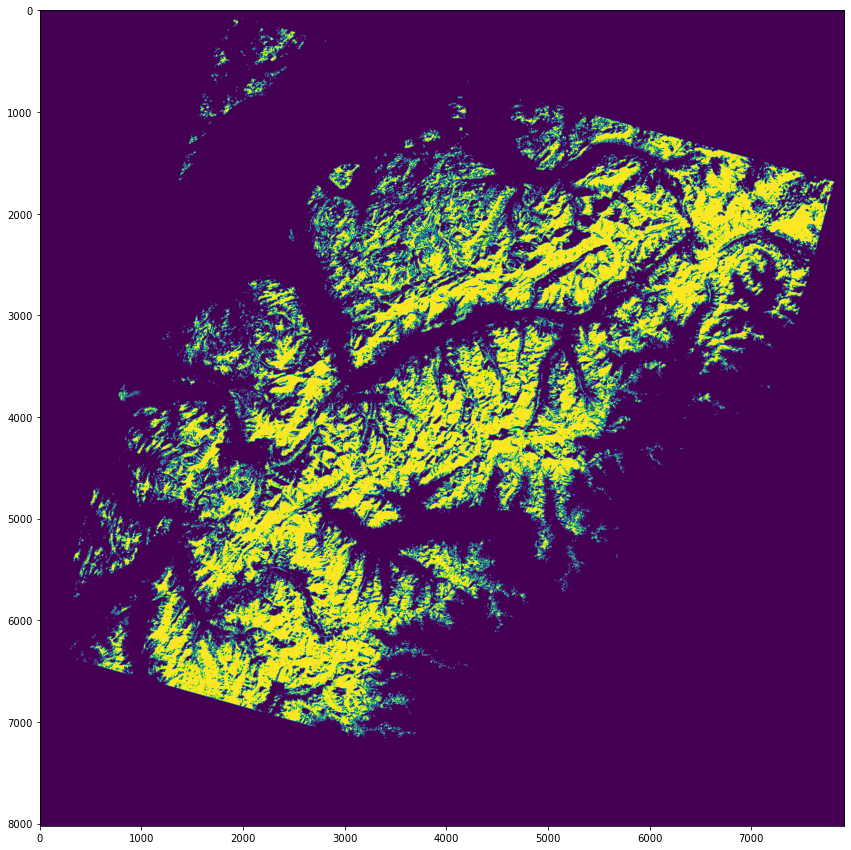

In [41]:
def calcul_NDSI(B3, B6): #Parametres : Image B3, Image B6

    if (size_check(B3, B6) == 1): 
    
        height_B3=B3.shape[0]
        width_B3=B3.shape[1]
        
        B3 = np.array(B3, dtype=float)
        B6 = np.array(B6, dtype=float)
        
        b = B3 + B6
        a = B3 - B6
        
        ndsi_threshold = np.zeros(a.shape)
        ndsi_threshold[b>0] = a[b>0] / b[b>0]
        
        ndsi_threshold = ndsi_threshold > 0.4
        ndsi_threshold = np.array(ndsi_threshold,dtype = float)
        
        return ndsi_threshold
    
    else : 
        return "error image size mismatch"
    
B3=io.imread('LC08_L2SP_195028_20220222_20220301_02_T1_SR_/LC08_L2SP_195028_20220222_20220301_02_T1_SR_B3.tif')
B6=io.imread('LC08_L2SP_195028_20220222_20220301_02_T1_SR_/LC08_L2SP_195028_20220222_20220301_02_T1_SR_B6.tif')
ndsi = calcul_NDSI(B3, B6)
np.max(ndsi)
_, ax = plt.subplots(figsize=(15,15))
ax.imshow(ndsi)
plt.show()

#### Original Image reconstruction

In the next function, we first reconstruct the original image (in the visible) with the band images.
For that, we use central limit theorem, in order to prevent images with  histograms that could be
offset from each other. We also normalized the intensity of histogramm because images are coded in 2 bytes, whereas image has to be coded 1 byte. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


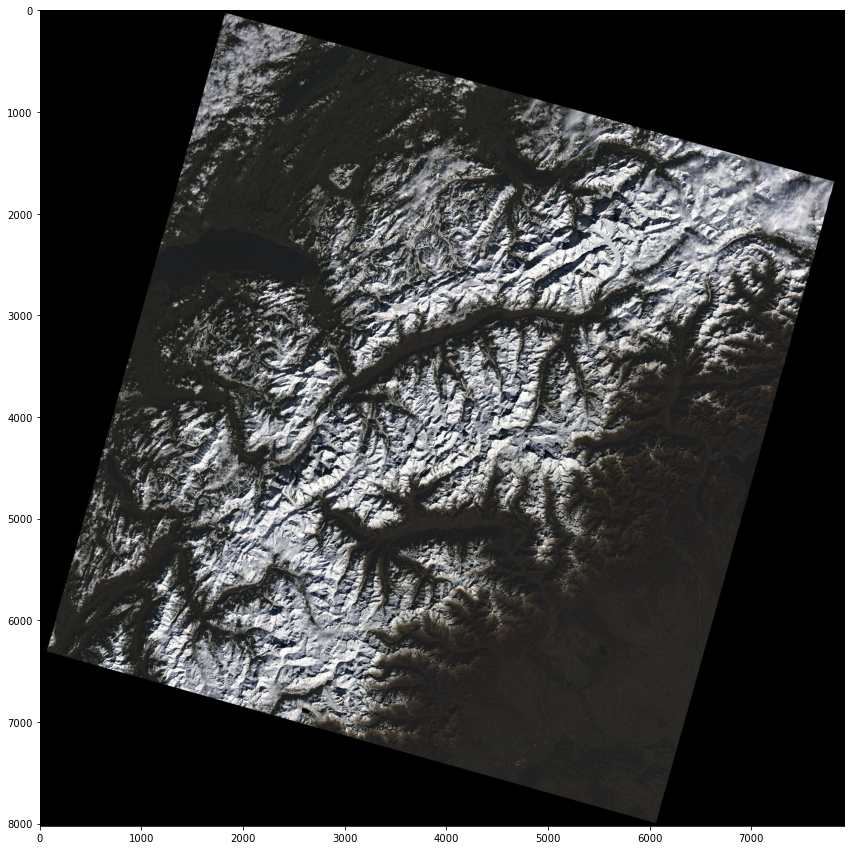

In [42]:
def recolorisation(B2,B3,B4): 
    
    B2 = np.array(B2, dtype=float)/(2 ** 16 - 1)
    B3 = np.array(B3, dtype=float)/(2 ** 16 - 1)
    B4 = np.array(B4, dtype=float)/(2 ** 16 - 1)
    
    mean = (np.mean(B2)+np.mean(B3)+np.mean(B4))/3 #Car pas les memes histogrammes
    std = (np.std(B2)+np.std(B3)+np.std(B4))/3
    
    B22 = ((B2-np.mean(B2))/np.std(B2)) * std + mean
    B23 = ((B3-np.mean(B3))/np.std(B3)) * std + mean
    B24 = ((B4-np.mean(B4))/np.std(B4)) * std + mean
    
    img_original = np.zeros(ndsi.shape)
    img_original = np.concatenate((B24[:,:,np.newaxis], B23[:,:,np.newaxis], B22[:,:,np.newaxis]), axis=2)

    return img_original

B2 = io.imread('LC08_L2SP_195028_20220222_20220301_02_T1_SR_/LC08_L2SP_195028_20220222_20220301_02_T1_SR_B2.tif')
B3 = io.imread('LC08_L2SP_195028_20220222_20220301_02_T1_SR_/LC08_L2SP_195028_20220222_20220301_02_T1_SR_B3.tif')
B4 = io.imread('LC08_L2SP_195028_20220222_20220301_02_T1_SR_/LC08_L2SP_195028_20220222_20220301_02_T1_SR_B4.tif')
original = recolorisation(B2,B3,B4)
np.max(original)
_, ax = plt.subplots(figsize=(15,15))
ax.imshow(original)
plt.show()

#### Recording

We now want to record images treated. 

In [43]:
io.imsave('test_enregistrement.tif', original.astype(original)) 

TypeError: Cannot construct a dtype from an array

### Comparison between the two methods 

In [ ]:
#Avec NDSI
print("Method 1 Snowfall surface:", snowfall_surface2D(ndsi),"m^2")
#Sans NDSI 
print("Method 2 Snowfall surface:", snowfall_surface3D(original),"m^2")
#Avec image de la collection landsat
img_treated = io.imread('LC08_L2SP_195028_20220222_20220301_02_T1_SR_/LC08_L2SP_195028_20220222_20220301_02_T1_SR_B2.tif')
print("NDSI calculation from Landsat collection :", snowfall_surface3D_blue(img_treated),"m^2")

#### Display of snow surface over time

In this code, we are using our images treated with snow cover displayed of different time at the same place, in order to trace image in function of time.

In [ ]:
def snowfall_surface_through_time(fichiers):
    
    surface = []

    for f in fichier:
        surface.append(snowfall_surface3D(f))
            
    plt.figure(2)
    plt.plot(fichier,surface,'r')
    plt.xlabel("date (aaaa_mm_jj)")
    plt.ylabel("surface enneigée (m2)")
    plt.title("Surface enneigée en fonction du temps")
    plt.legend()
    plt.grid()
    plt.show()

#Demo
Mesfichiers = ["test/2020_04_05.jpg","test/2020_05_07.jpg","test/2020_06_24.jpg","test/2020_07_10.jpg","test/2020_07_26.jpg"]
snowfall_surface_through_time(Mesfichiers)